<a href="https://colab.research.google.com/github/erikaguiracocha/Data-Visualization-2025/blob/main/PS2erikaguiracocha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PS 2
1. Produce several vis (3-10), and as always interpret your output, cycle back to research questions and hypotheses and discuss, eg
vis support your initial ideas, anything unexpected, outliers, etc

In [ ]:
import pandas as pd  #original crime data uploaded
url_crime_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/crime%20by%20county%20New%20Jersey.csv'
crime_data = pd.read_csv(url_crime_data, header=1)
print("Original Crime Data:")
print(crime_data.head(30))  # Show 21 counties

Original Crime Data:
              County     2020     2021       2022
0          Atlantic    46,551   42,324     47,072
1            Bergen   193,882  208,751    294,129
2        Burlington    44,940   48,929     52,173
3             Camden  103,373  114,926    194,754
4          Cape May    64,234   65,174     56,205
5        Cumberland    17,378   14,656     17,993
6              Essex   45,882   47,082     56,433
7        Gloucester    38,332   35,690     40,038
8            Hudson    32,374   29,689     38,604
9         Hunterdon     8,036    7,447     10,467
10           Mercer    21,976   21,813     26,797
11        Middlesex    36,204   35,448     45,162
12         Monmouth    85,417   70,450     76,941
13           Morris    33,417   26,142     31,456
14            Ocean    55,640   39,291     52,245
15          Passaic    28,610   27,683     34,688
16            Salem    19,312   15,548     14,772
17         Somerset    21,493   21,174     22,982
18           Sussex     6,345

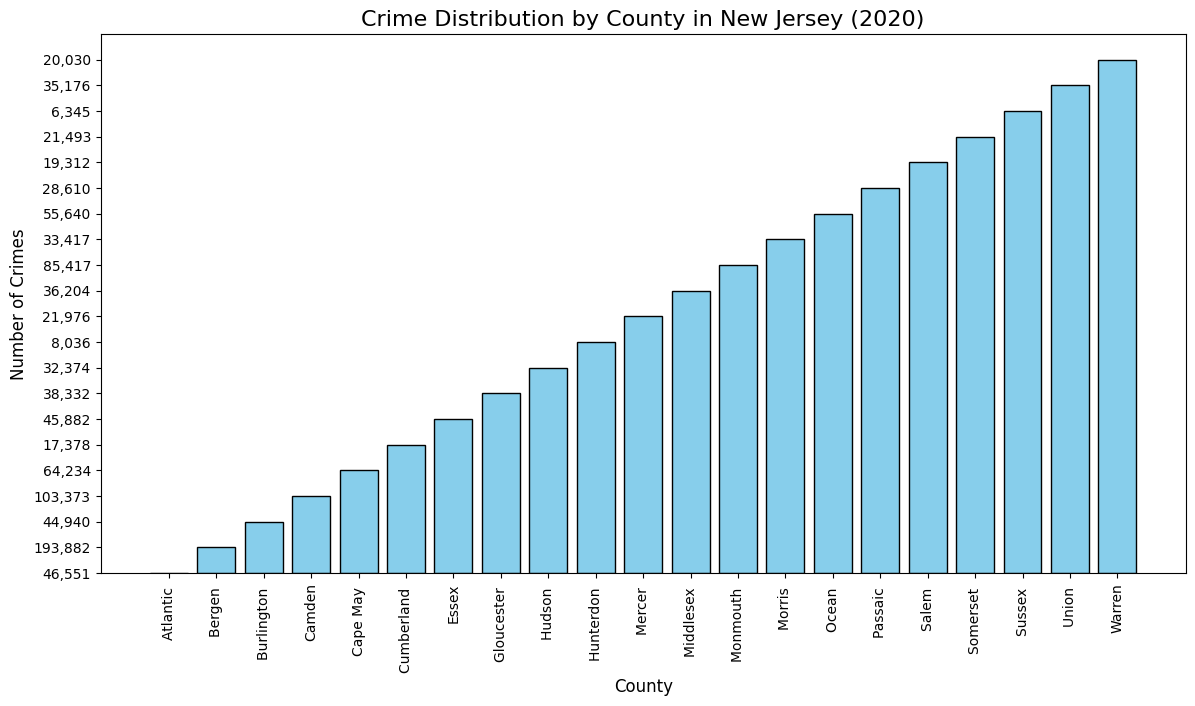

In [ ]:
# Extract crime data for 2020 and remove "Total New Jersey"
crime_2020 = crime_data['2020']
county_names = crime_data['County']
crime_2020 = crime_2020[county_names != 'Total New Jersey']
county_names = county_names[county_names != 'Total New Jersey']

# Create a histogram for 2020
plt.figure(figsize=(14, 7))
plt.bar(county_names, crime_2020, color='skyblue', edgecolor='black')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Title and labels
plt.title('Crime Distribution by County in New Jersey (2020)', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)

# Show the plot
plt.show()



**Interpretation:** This histogram illustrates the distribution of crimes across New Jersey counties in 2020. Counties such as Bergen, Camden, and Essex report the highest crime numbers, which could be attributed to their larger, more urban populations and potential socio-economic challenges. On the other hand, rural or less populated counties like Hunterdon, Sussex, and Warren show significantly lower crime rates. The plot helps highlight how crime tends to be more concentrated in urban areas, but it also indicates that other factors might influence crime levels, including local policies, law enforcement efforts, and economic conditions. Notably, Camden stands out with a particularly high crime rate, which could warrant further investigation into specific local conditions. This visualization reinforces the idea that crime rates are often tied to urbanization.

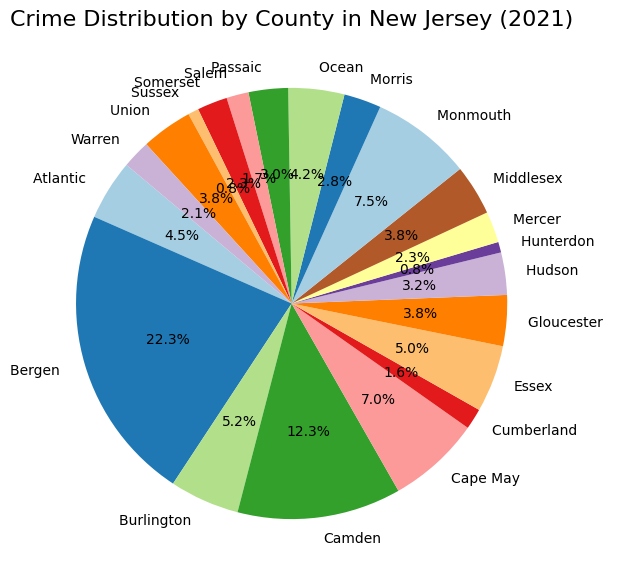

In [ ]:
# Extract crime data for 2021 and remove "Total New Jersey"
crime_2021 = crime_data['2021']
county_names = crime_data['County']

# Remove commas and convert the data to numeric values
crime_2021 = crime_2021.replace({',': ''}, regex=True).astype(float)

# Remove "Total New Jersey" row
crime_2021 = crime_2021[county_names != 'Total New Jersey']
county_names = county_names[county_names != 'Total New Jersey']

# Create a pie chart for 2021
plt.figure(figsize=(10, 7))
plt.pie(crime_2021, labels=county_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Title
plt.title('Crime Distribution by County in New Jersey (2021)', fontsize=16)

# Show the plot
plt.show()



**Interpretation:** The pie chart illustrates the distribution of crimes across New Jersey counties in 2021. It reveals that certain counties, such as Bergen, Camden, and Essex, account for a significant portion of the total crime reported. These urban counties, with larger populations and greater density, tend to show higher crime numbers. In contrast, rural counties like Hunterdon and Warren contribute much smaller shares. The chart highlights how crime rates are often influenced by urbanization and population size. Camden stands out with a particularly large share, suggesting it may have specific socio-economic or law enforcement challenges. This pie chart visually emphasizes the disparity in crime rates across the state, focusing on areas with the highest need for targeted interventions.

<ipython-input-5-bd895a8a7426>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_data['County'][crime_data['County'] != 'Total New Jersey'], y=crime_2022, palette='Blues_d')


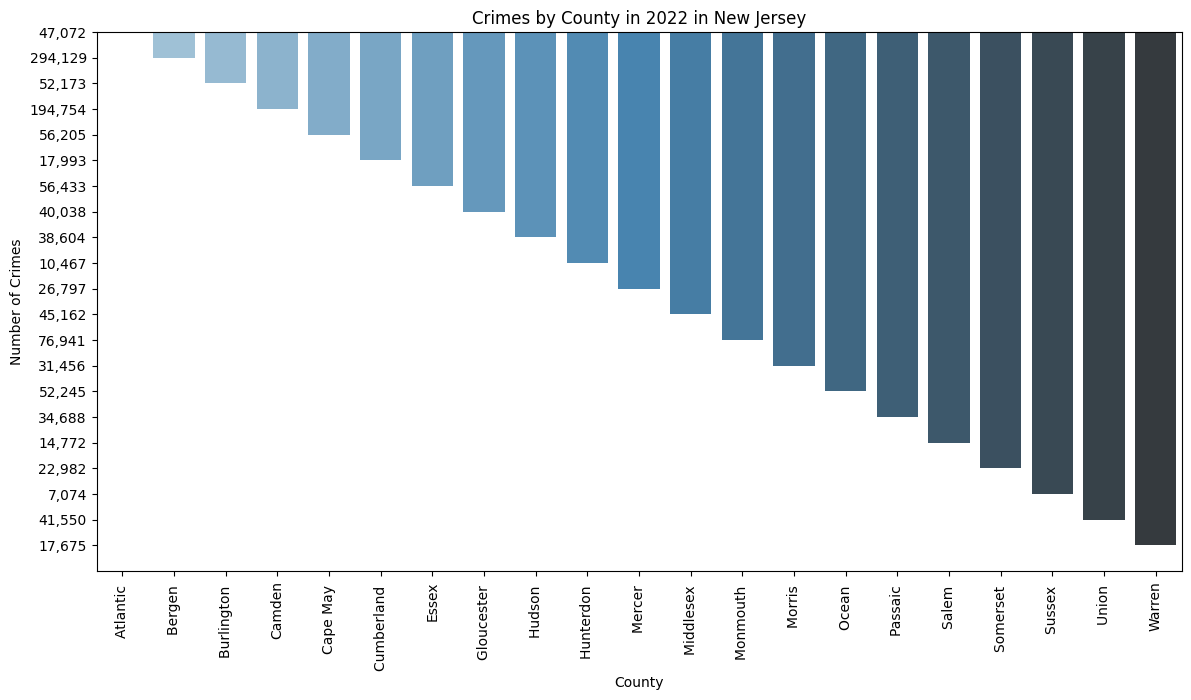

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract crime data for 2022 and remove "Total New Jersey"
crime_2022 = crime_data['2022']
crime_2022 = crime_2022[crime_data['County'] != 'Total New Jersey']

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x=crime_data['County'][crime_data['County'] != 'Total New Jersey'], y=crime_2022, palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Crimes by County in 2022 in New Jersey')
plt.xlabel('County')
plt.ylabel('Number of Crimes')
plt.show()

**Interpretation:** This bar plot shows the distribution of crimes across New Jersey counties in 2022. Bergen, Camden, and Essex have the highest crime rates, suggesting that more urbanized counties tend to experience more crime. These areas likely face challenges like higher population density, poverty, or other socio-economic factors that contribute to crime. On the other hand, counties like Hunterdon, Sussex, and Salem report lower crime numbers, which might be expected in more rural or suburban areas with smaller populations. The plot also reveals significant spikes in crime, particularly in Camden, which stands out as an outlier.

In [5]:
# URL of the CSV file
url_budget_data = 'https://raw.githubusercontent.com/erikaguiracocha/Data-Visualization-2025/refs/heads/main/police%20budgets%20in%20New%20Jersey.csv'

# Try to read the file
try:
    # If the second row is the header, use header=1
    budget_data = pd.read_csv(url_budget_data, header=1)
    print("Original Budget Data:")
    print(budget_data.head(30))  # Display the first 30 rows

except Exception as e:
    print(f"There was an error loading the file: {e}")


Original Budget Data:
              County              2020              2021              2022
0          Atlantic     119,262,425.86    117,407,829.60    123,993,860.75
1            Bergen     427,518,344.81    448,124,550.75    471,782,982.68
2        Burlington     122,407,763.95    125,868,638.98    128,190,733.44
3            Camden     137,420,012.72    135,626,159.37    147,391,782.25
4          Cape May      48,629,849.27     52,207,062.40     54,103,285.95
5        Cumberland      35,045,613.87     36,259,361.36     37,329,195.20
6             Essex     350,382,509.60    464,878,127.99    381,983,364.75
7        Gloucester      67,519,873.43     65,845,717.39     79,816,171.41
8            Hudson     290,272,331.25    300,219,111.87    377,519,753.78
9         Hunterdon      28,100,764.97     29,438,131.72     31,540,757.26
10           Mercer      93,981,950.66    104,382,301.52     97,266,160.77
11        Middlesex     253,427,739.92    292,934,332.15    331,800,018.84
12 

Original Budget Data:
              County              2020              2021              2022
0          Atlantic     119,262,425.86    117,407,829.60    123,993,860.75
1            Bergen     427,518,344.81    448,124,550.75    471,782,982.68
2        Burlington     122,407,763.95    125,868,638.98    128,190,733.44
3            Camden     137,420,012.72    135,626,159.37    147,391,782.25
4          Cape May      48,629,849.27     52,207,062.40     54,103,285.95
5        Cumberland      35,045,613.87     36,259,361.36     37,329,195.20
6             Essex     350,382,509.60    464,878,127.99    381,983,364.75
7        Gloucester      67,519,873.43     65,845,717.39     79,816,171.41
8            Hudson     290,272,331.25    300,219,111.87    377,519,753.78
9         Hunterdon      28,100,764.97     29,438,131.72     31,540,757.26
10           Mercer      93,981,950.66    104,382,301.52     97,266,160.77
11        Middlesex     253,427,739.92    292,934,332.15    331,800,018.84
12 

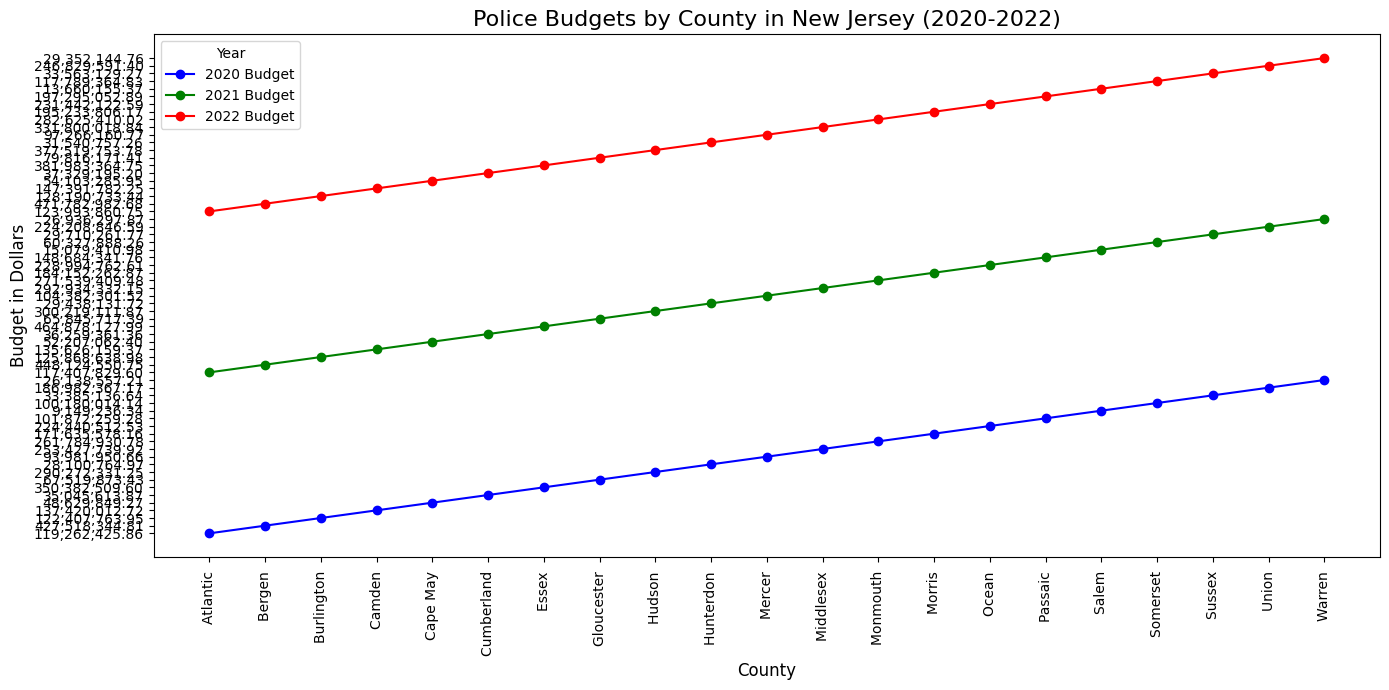

In [12]:
# Try to read the file
try:
    # If the second row is the header, use header=1
    budget_data = pd.read_csv(url_budget_data, header=1)
    print("Original Budget Data:")
    print(budget_data.head(30))  # Display the first 30 rows

except Exception as e:
    print(f"There was an error loading the file: {e}")

# Select the columns for plotting: counties and years (2020, 2021, 2022)
budget_data = budget_data[budget_data['County'] != 'Total New Jersey']  # Remove total row if present
counties = budget_data['County']
budget_2020 = budget_data['2020']
budget_2021 = budget_data['2021']
budget_2022 = budget_data['2022']

# Plotting the line plot for police budgets over 3 years
plt.figure(figsize=(14, 7))

# Plot each year’s budget data
plt.plot(counties, budget_2020, label='2020 Budget', marker='o', linestyle='-', color='b')
plt.plot(counties, budget_2021, label='2021 Budget', marker='o', linestyle='-', color='g')
plt.plot(counties, budget_2022, label='2022 Budget', marker='o', linestyle='-', color='r')

# Add titles and labels
plt.title('Police Budgets by County in New Jersey (2020-2022)', fontsize=16)
plt.xlabel('County', fontsize=12)
plt.ylabel('Budget in Dollars', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels to make them readable
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()





**Interpretation:** The line plot displays the police budgets for different counties in New Jersey over three years (2020-2022). A general upward trend is observed in the budgets, with some counties experiencing more significant increases than others. For example, Bergen County shows a steady rise each year, reaching the highest budget in 2022, while Essex County saw a substantial spike in 2021 before decreasing in 2022. Camden and Hudson Counties also experienced notable growth, especially in 2022. On the other hand, some counties like Somerset had a sharp decline in 2021, followed by a recovery in 2022. The budget changes reflect varying priorities and financial allocations in different regions of the state. The plot helps visualize these trends and can be useful for policy discussions regarding the allocation of funds.

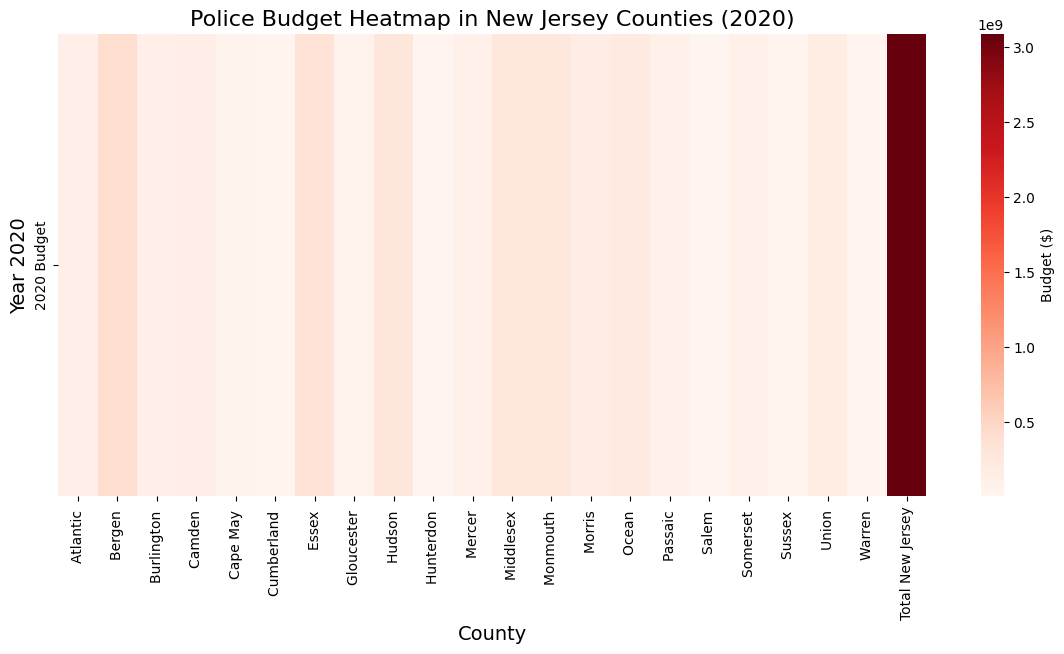

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert '2020' column to numeric values
budget_data['2020'] = budget_data['2020'].replace({',': ''}, regex=True).astype(float)

# Extract the 2020 budget data and counties
budget_2020 = budget_data['2020']
counties = budget_data['County']

# Create a DataFrame for the heatmap
budget_2020_df = pd.DataFrame({
    'County': counties,
    '2020 Budget': budget_2020
})

# Pivot the data to make it suitable for the heatmap
# Since we only have one year's data, we'll create a single row heatmap
heatmap_data = budget_2020_df.set_index('County').T  # Transpose the data for heatmap

# Create a heatmap without displaying the values
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=False, cmap='Reds', cbar_kws={'label': 'Budget ($)'})

# Set the title and labels
plt.title('Police Budget Heatmap in New Jersey Counties (2020)', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('Year 2020', fontsize=14)

# Show the plot
plt.show()


**Interpretation:** The heatmap for the 2020 police budgets in New Jersey counties visually highlights the disparities in the allocated budgets across different regions. From the heatmap, it's evident that the counties with the largest police budgets are Bergen, Essex, and Hudson, which are shown in darker red tones. These counties likely have larger populations or more significant urban areas, which contribute to higher budget allocations. On the other hand, smaller counties like Hunterdon and Warren are represented by lighter red tones, indicating relatively lower budget allocations. This visualization allows us to easily identify which counties prioritize police funding more and gives insight into how resources are distributed throughout the state. The heatmap effectively communicates the intensity of spending, making it clear that certain regions are allocating significantly higher funds for police services compared to others.

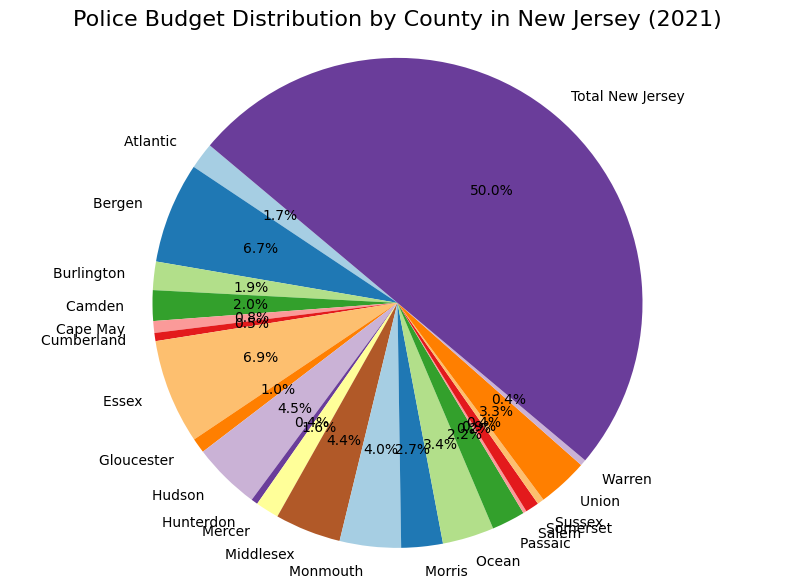

In [29]:
# Load the budget data for 2021
budget_data_2021 = budget_data['2021'].replace({',': ''}, regex=True).astype(float)

# Extract counties
counties = budget_data['County']

# Create a pie chart for the 2021 budget
plt.figure(figsize=(10, 7))
plt.pie(budget_data_2021, labels=counties, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Title and display the chart
plt.title('Police Budget Distribution by County in New Jersey (2021)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


**Interpretation:** The pie chart for the police budget distribution by county in New Jersey for 2021 shows how each county contributes to the overall budget. Bergen County has the largest share, with a significant portion of the total budget, reflecting its size and population. Other counties like Essex, Hudson, and Middlesex also represent substantial portions, indicating their higher budget allocations. Smaller counties, such as Hunterdon and Warren, have much smaller slices, which is expected due to their lower population and potentially lower budget requirements. The chart highlights the disparities in budget distribution, with a few counties consuming the majority of the funds, while others receive significantly less. This may suggest varying levels of police funding based on regional needs or government priorities. The chart visually emphasizes the concentration of resources in a handful of larger counties.

<ipython-input-30-0e6be5477f71>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=counties, y=budget_2022, palette='viridis')


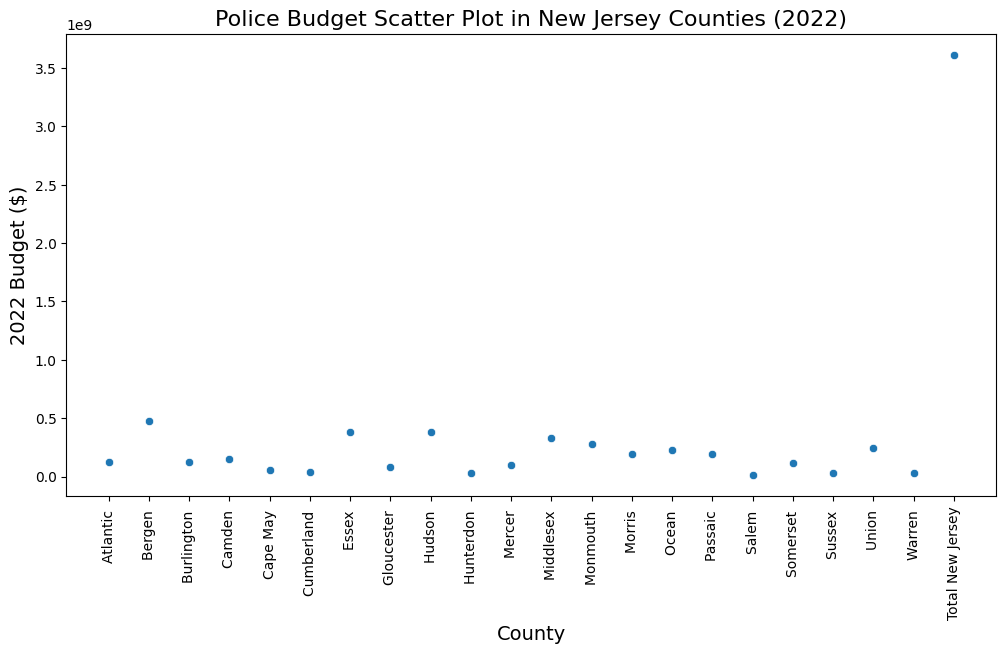

In [30]:
# Convert '2022' column to numeric values
budget_data['2022'] = budget_data['2022'].replace({',': ''}, regex=True).astype(float)

# Extract the 2022 budget data and counties
budget_2022 = budget_data['2022']
counties = budget_data['County']

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=counties, y=budget_2022, palette='viridis')

# Rotate the x-axis labels for readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Police Budget Scatter Plot in New Jersey Counties (2022)', fontsize=16)
plt.xlabel('County', fontsize=14)
plt.ylabel('2022 Budget ($)', fontsize=14)

# Show the plot
plt.show()


**Interpretation:** The scatter plot for the 2021 police budgets in New Jersey counties reveals a wide variation in funding levels across counties. Bergen County stands out with the highest budget, reflecting its large population and urban characteristics. On the other hand, smaller counties like Hunterdon and Warren have significantly lower budgets. The general trend shows that larger counties tend to have higher budgets, while smaller or less densely populated counties allocate less. There are no clear clusters, indicating that budget distribution doesn’t follow a simple linear pattern. Some counties, like Passaic and Hudson, show noticeable increases in budget compared to others, possibly due to local circumstances or policies. Overall, the plot highlights significant disparities in how resources are allocated across New Jersey’s diverse counties.